In [1]:
import requests
import json
import urllib
import xarray as xr
import pandas as pd
from datetime import datetime

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

In [2]:
collections = requests.get("https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections")
jprint(collections.json())

{
    "collections": [
        {
            "crs": [
                "EPSG:4326"
            ],
            "data_queries": {
                "area": {
                    "link": {
                        "href": "https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nasa-gddp/area",
                        "hreflang": "en",
                        "length": 0,
                        "rel": "data",
                        "title": "",
                        "type": "",
                        "variables": {
                            "crs_details": [
                                {
                                    "crs": "EPSG:4326",
                                    "wkt": "https://epsg.io/4326.wkt"
                                }
                            ],
                            "description": "Query to return data for a defined well known text area",
                            "output_formats": [
                                "CoverageJSON",
          

In [23]:
class Collection():
    def __init__(self, obj, extent) -> None:
        self.data_queries = obj['data_queries']
        self.crs = obj['crs']
        self.output_formats = obj['output_formats']
        self.parameter_names = obj['parameter_names']
        self.extent = extent

In [4]:
colls=dict()

In [24]:
for i in collections.json()['collections']:
    extent = i['extent']['spatial']
    colls[i['id']]=Collection(i,extent)

In [6]:
colls.keys()

dict_keys(['nasa-gddp', 'nclimgrid-monthly', 'livneh-monthly', 'loca2-monthly-historical', 'loca2-monthly-future'])

In [8]:
c = 'nclimgrid-monthly'
params = colls[c].data_queries
[params[p]['link']['href'] for p in params.keys()]

['https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nclimgrid-monthly/position',
 'https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nclimgrid-monthly/area',
 'https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nclimgrid-monthly/radius',
 'https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nclimgrid-monthly/cube',
 'https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nclimgrid-monthly/trajectory',
 'https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nclimgrid-monthly/corridor']

In [25]:
colls[c].extent

{'bbox': [['-124.6875', '24.562532', '-67.020836', '49.3542']],
 'crs': 'WGS:84',
 'name': 'Latitude/Longitude'}

In [8]:
collection='nclimgrid-monthly'#'loca2-monthly-future'#'nclimgrid-monthly'
param='prcp'#'pr%20IPSL_CM6A_LR_ssp245_r1i1p1f1'#'prcp'

In [9]:
minlat="39.54217596171196"
maxlat="41.86547012230937"
minlon="-79.14550781250001"
maxlon="-68.86230468750001"

coord_str = lambda x,y,end=False: x + "%20" + y + ("" if end else ",")
area = coord_str(minlon,minlat)+coord_str(minlon,maxlat)+coord_str(maxlon,maxlat)+coord_str(maxlon,minlat)+coord_str(minlon,minlat,end=True)

print(area)
print("-79.14550781250001%2039.54217596171196,-79.14550781250001%2041.86547012230937,-68.86230468750001%2041.86547012230937,-68.86230468750001%2039.54217596171196,-79.14550781250001%2039.54217596171196")

-79.14550781250001%2039.54217596171196,-79.14550781250001%2041.86547012230937,-68.86230468750001%2041.86547012230937,-68.86230468750001%2039.54217596171196,-79.14550781250001%2039.54217596171196
-79.14550781250001%2039.54217596171196,-79.14550781250001%2041.86547012230937,-68.86230468750001%2041.86547012230937,-68.86230468750001%2039.54217596171196,-79.14550781250001%2039.54217596171196


In [10]:
str2dt = lambda str: datetime(int(str[0:4]),int(str[4:6]),int(str[6:8]),0,0,0).strftime("%Y-%m-%dT%H:%M:%SZ")
start_time = str2dt("20200101")#20210101")
end_time = str2dt("20210201")#20210201")

print(start_time)
print("1895-01-01T05:00:00.000Z")


2020-01-01T00:00:00Z
1895-01-01T05:00:00.000Z


In [72]:
url = 'https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/{collection}/cube?coords=POLYGON(({area}))&parameter-name={param}&datetime={start}/{end}&crs=EPSG:4326&f=NetCDF'.format(collection=collection,param=param,area=area,start=start_time,end=end_time)
print(url)

https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nclimgrid-monthly/cube?coords=POLYGON((-79.14550781250001%2039.54217596171196,-79.14550781250001%2041.86547012230937,-68.86230468750001%2041.86547012230937,-68.86230468750001%2039.54217596171196,-79.14550781250001%2039.54217596171196))&parameter-name=prcp&datetime=2020-01-01T00:00:00Z/2021-02-01T00:00:00Z&crs=EPSG:4326&f=NetCDF


In [78]:
url = 'https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/{collection}/position?coords=POINT({minlon},{minlat})&parameter-name={param}&datetime={start}/{end}&crs=EPSG:4326&f=NetCDF'.format(collection=collection,param=param,minlon=minlon,minlat=minlat,start=start_time,end=end_time)
print(url)

https://edr-api-c.mdl.nws.noaa.gov/Climate-EDR/collections/nclimgrid-monthly/position?coords=POINT(-79.14550781250001,39.54217596171196)&parameter-name=prcp&datetime=2020-01-01T00:00:00Z/2021-02-01T00:00:00Z&crs=EPSG:4326&f=NetCDF


In [76]:
urllib.request.urlretrieve(url,'sdf.nc')

('sdf.nc', <http.client.HTTPMessage at 0x280e96a6e50>)

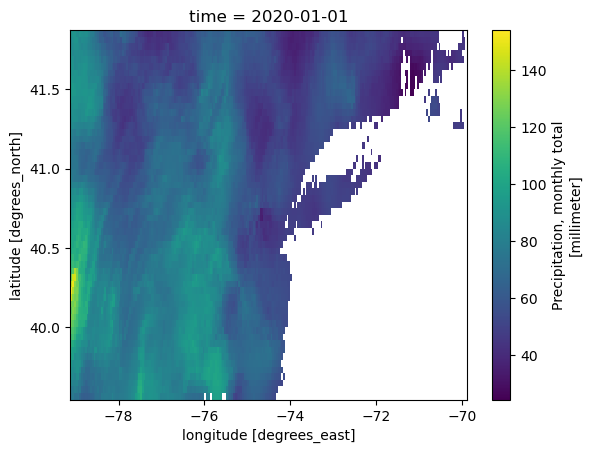

In [77]:
xr.open_dataset('sdf.nc').isel(time=0).prcp.plot()#.drop_vars('time').tmax.plot()